<a href="https://colab.research.google.com/github/ishitasachan02/Data-Science-Mentor-And-Development-/blob/main/Book_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is a regression based problem statement where we have to predict the price of the book based on multiple features/variables.

### Following steps are used:

#### 1) Import the libraries
#### 2) Load the dataset using pandas
#### 3) Data pre-processing
#### 4) Model training
#### 5) Model evaluation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Train_book_price.csv to Train_book_price.csv


####Converting csv to dataframe


In [4]:
df=pd.read_csv("Train_book_price.csv",encoding='cp1252')

In [5]:
df.head()     #to display the dataframe

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [6]:
df.columns  #displays the list of column names

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [7]:
df.shape   #(rows,columns)

(6237, 9)

In [8]:
df.dtypes    #returs the datatypes of columns

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

### Data Pre-processing

### 1) Reviews

In [9]:
df['Reviews'].unique()

array(['4.0 out of 5 stars', '3.9 out of 5 stars', '4.8 out of 5 stars',
       '4.1 out of 5 stars', '5.0 out of 5 stars', '4.5 out of 5 stars',
       '4.4 out of 5 stars', '4.7 out of 5 stars', '4.2 out of 5 stars',
       '4.9 out of 5 stars', '3.5 out of 5 stars', '3.8 out of 5 stars',
       '4.3 out of 5 stars', '3.1 out of 5 stars', '4.6 out of 5 stars',
       '2.0 out of 5 stars', '3.7 out of 5 stars', '3.2 out of 5 stars',
       '2.6 out of 5 stars', '2.8 out of 5 stars', '3.4 out of 5 stars',
       '2.9 out of 5 stars', '3.3 out of 5 stars', '3.0 out of 5 stars',
       '2.5 out of 5 stars', '1.0 out of 5 stars', '3.6 out of 5 stars',
       '2.7 out of 5 stars', '1.5 out of 5 stars', '2.3 out of 5 stars',
       '1.7 out of 5 stars', '2.2 out of 5 stars', '1.4 out of 5 stars',
       '2.4 out of 5 stars', '1.6 out of 5 stars', '2.1 out of 5 stars'],
      dtype=object)

In [10]:
df['Reviews']=df['Reviews'].apply(lambda x: x.split(' ')[0])

In [11]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [12]:
df['Reviews'].unique()

array(['4.0', '3.9', '4.8', '4.1', '5.0', '4.5', '4.4', '4.7', '4.2',
       '4.9', '3.5', '3.8', '4.3', '3.1', '4.6', '2.0', '3.7', '3.2',
       '2.6', '2.8', '3.4', '2.9', '3.3', '3.0', '2.5', '1.0', '3.6',
       '2.7', '1.5', '2.3', '1.7', '2.2', '1.4', '2.4', '1.6', '2.1'],
      dtype=object)

In [13]:
df['Reviews']=df['Reviews'].astype(float)    #converting object type of review to float type using astype

In [14]:
df.dtypes

Title            object
Author           object
Edition          object
Reviews         float64
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

### 2) Ratings

In [15]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [16]:
df['Ratings'].unique()

array(['8 customer reviews', '14 customer reviews', '6 customer reviews',
       '13 customer reviews', '1 customer review', '72 customer reviews',
       '16 customer reviews', '111 customer reviews',
       '132 customer reviews', '17 customer reviews',
       '4 customer reviews', '3 customer reviews', '5 customer reviews',
       '2 customer reviews', '23 customer reviews', '76 customer reviews',
       '10 customer reviews', '9 customer reviews', '15 customer reviews',
       '34 customer reviews', '32 customer reviews',
       '49 customer reviews', '62 customer reviews',
       '61 customer reviews', '7 customer reviews', '18 customer reviews',
       '98 customer reviews', '12 customer reviews',
       '97 customer reviews', '285 customer reviews',
       '29 customer reviews', '27 customer reviews',
       '267 customer reviews', '24 customer reviews',
       '146 customer reviews', '95 customer reviews',
       '234 customer reviews', '35 customer reviews',
       '66 custome

In [17]:
df['Ratings']=df['Ratings'].str.extract('(\d+)')

In [18]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [19]:
df['Ratings']=df['Ratings'].astype(float)

In [20]:
df.dtypes

Title            object
Author           object
Edition          object
Reviews         float64
Ratings         float64
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

In [21]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


### 3) Edition

#### 3.1) Edition year

In [22]:
df['Edition'].unique()

array(['Paperback,– 10 Mar 2016', 'Paperback,– 7 Nov 2012',
       'Paperback,– 25 Feb 1982', ..., 'Paperback,– 26 Sep 2006',
       'Paperback,– 21 Nov 2016', 'Paperback,– 15 Jan 2015'], dtype=object)

In [23]:
df['Edition_year']=df['Edition'].apply(lambda x: x.split(' ')[-1] if x.split(' ')[-1].isdigit() else 'NAN')

In [24]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006


In [25]:
df_train=df[df['Edition_year']!='NAN']  #handling NAN

In [26]:
df_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006


In [27]:
df_train.shape

(6216, 10)

In [28]:
df.shape

(6237, 10)

In [29]:
df_train['Edition_year'].unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', '1997', '1995', '1987', '1986',
       '1990', '1988', '1981', '1976', '1994', '1998', '1977', '1974',
       '1983', '1971', '1985', '1978', '1964', '1984', '1980', '1979',
       '1960', '1970', '1975', '1905', '1900', '1961', '1925', '1973'],
      dtype=object)

#### 3.2) Edition Type

In [30]:
df_train['Edition'].unique()

array(['Paperback,– 10 Mar 2016', 'Paperback,– 7 Nov 2012',
       'Paperback,– 25 Feb 1982', ..., 'Paperback,– 26 Sep 2006',
       'Paperback,– 21 Nov 2016', 'Paperback,– 15 Jan 2015'], dtype=object)

In [31]:
df_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006


In [32]:
df_train['Edition_type']=df['Edition'].apply(lambda x: x.split(',')[0])

<ipython-input-32-2758969a2405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Edition_type']=df['Edition'].apply(lambda x: x.split(',')[0])


In [33]:
df_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_year,Edition_type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006,Hardcover


In [34]:
df_train['Edition_type'].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada)', 'Product Bundle', 'Library Binding', '(German)',
       'Leather Bound', '(French)', '(Spanish)'], dtype=object)

In [35]:
df_train['Edition_type']=df_train['Edition_type'].replace('(Kannada)','Kannada')

<ipython-input-35-6d241f2f08a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Edition_type']=df_train['Edition_type'].replace('(Kannada)','Kannada')


In [36]:
df_train['Edition_type']=df_train['Edition_type'].replace('(German)','German')

<ipython-input-36-47a47e84d59f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Edition_type']=df_train['Edition_type'].replace('(German)','German')


In [37]:
df_train['Edition_type']=df_train['Edition_type'].replace('(French)','French')

<ipython-input-37-b9c27d49d153>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Edition_type']=df_train['Edition_type'].replace('(French)','French')


In [38]:
df_train['Edition_type']=df_train['Edition_type'].replace('(Spanish)','Spanish')

<ipython-input-38-287bf2565338>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Edition_type']=df_train['Edition_type'].replace('(Spanish)','Spanish')


In [39]:
df_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_year,Edition_type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006,Hardcover


In [40]:
df_train['Edition_type'].value_counts()

Paperback                5178
Hardcover                 818
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Perfect Paperback           1
Board book                  1
Kannada                     1
Product Bundle              1
Library Binding             1
German                      1
Leather Bound               1
French                      1
Spanish                     1
Name: Edition_type, dtype: int64

In [41]:
df_train.drop('Edition',axis=1,inplace=True)

<ipython-input-41-a8db63d1a5fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('Edition',axis=1,inplace=True)


In [42]:
df_train.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_year,Edition_type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006,Hardcover


In [43]:
df_train.shape

(6216, 10)

In [44]:
df_train['Genre'].unique()

array(['Action & Adventure (Books)', 'Cinema & Broadcast (Books)',
       'International Relations', 'Contemporary Fiction (Books)',
       'Photography Textbooks', 'Healthy Living & Wellness (Books)',
       'Crime, Thriller & Mystery (Books)',
       'Sports Training & Coaching (Books)',
       'Biographies & Autobiographies (Books)', 'Asian History',
       'Banks & Banking', 'Comics & Mangas (Books)',
       "Children's Mysteries & Curiosities (Books)", 'Mangas',
       'Artificial Intelligence',
       'Software & Business Applications (Books)', 'German',
       'International Business', 'Cricket (Books)',
       'Comics & Graphic Novels (Books)', 'PC & Video Games (Books)',
       'Short Stories (Books)', 'Astrology', 'Romance (Books)', 'Design',
       'Introductory & Beginning Programming', 'Travel (Books)',
       'Sports (Books)', 'Communications', 'Foreign Languages',
       'Linguistics (Books)', 'Music Books',
       'Outdoor Survival Skills (Books)', 'True Accounts (Books

In [45]:
df_train.Genre = df_train.Genre.apply(lambda x: x.strip(' (Books) ').strip('Textbooks'))

<ipython-input-45-8467625c5227>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.Genre = df_train.Genre.apply(lambda x: x.strip(' (Books) ').strip('Textbooks'))


In [46]:
df_train.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_year,Edition_type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventur,Action & Adventure,220.00,2016,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadca,"Biographies, Diaries & True Accounts",202.93,2012,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6.0,"""During the time men live without a common Pow...",International Relation,Humour,299.00,1982,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction,"Crime, Thriller & Mystery",180.00,2017,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography,"Arts, Film & Photography",965.62,2006,Hardcover


In [47]:
df_train.drop(['Title','Synopsis'],axis=1,inplace=True)

<ipython-input-47-079507fef1b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['Title','Synopsis'],axis=1,inplace=True)


In [48]:
df_train.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_year,Edition_type
0,Chris Kuzneski,4.0,8.0,Action & Adventur,Action & Adventure,220.00,2016,Paperback
1,Arun Khopkar,3.9,14.0,Cinema & Broadca,"Biographies, Diaries & True Accounts",202.93,2012,Paperback
2,Thomas Hobbes,4.8,6.0,International Relation,Humour,299.00,1982,Paperback
3,Agatha Christie,4.1,13.0,Contemporary Fiction,"Crime, Thriller & Mystery",180.00,2017,Paperback
4,Editors of Life,5.0,1.0,Photography,"Arts, Film & Photography",965.62,2006,Hardcover


## Encoding Categorical variable : converting categorical variables to numbers using label encoder and one hot encoding

In [49]:
df_train=df_train.astype({'Author':'category','Genre':'category','BookCategory':'category','Edition_year':'category','Edition_type':'category'})

In [50]:
df_train.dtypes

Author          category
Reviews          float64
Ratings          float64
Genre           category
BookCategory    category
Price            float64
Edition_year    category
Edition_type    category
dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()

In [53]:
df_train['Edition_year']=le.fit_transform(df_train['Edition_year'])

In [54]:
df_train.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_year,Edition_type
0,Chris Kuzneski,4.0,8.0,Action & Adventur,Action & Adventure,220.00,52,Paperback
1,Arun Khopkar,3.9,14.0,Cinema & Broadca,"Biographies, Diaries & True Accounts",202.93,48,Paperback
2,Thomas Hobbes,4.8,6.0,International Relation,Humour,299.00,18,Paperback
3,Agatha Christie,4.1,13.0,Contemporary Fiction,"Crime, Thriller & Mystery",180.00,53,Paperback
4,Editors of Life,5.0,1.0,Photography,"Arts, Film & Photography",965.62,42,Hardcover


In [55]:
BookCategory=df_train[['BookCategory']]
BookCategory=pd.get_dummies(BookCategory,drop_first=True)

In [56]:
BookCategory

,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6232,0,0,0,0,0,1,0,0,0,0
6233,0,0,0,0,1,0,0,0,0,0
6234,0,0,0,0,0,0,0,0,1,0
6235,0,0,0,0,0,0,0,0,0,0


In [57]:
df_train['Author']=le.fit_transform(df_train['Author'])

In [58]:
df_train['Genre']=le.fit_transform(df_train['Genre'])

In [59]:
Edition_type=df_train[['Edition_type']]
Edition_type=pd.get_dummies(Edition_type,drop_first=True)

In [60]:
Edition_type

,Edition_type_Cards,Edition_type_Flexibound,Edition_type_French,Edition_type_German,Edition_type_Hardcover,Edition_type_Kannada,Edition_type_Leather Bound,Edition_type_Library Binding,Edition_type_Loose Leaf,Edition_type_Mass Market Paperback,Edition_type_Paperback,Edition_type_Perfect Paperback,Edition_type_Product Bundle,Edition_type_Sheet music,Edition_type_Spanish,Edition_type_Spiral-bound,Edition_type_Tankobon Softcover
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6233,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6234,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6235,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [61]:
df_train.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_year,Edition_type
0,612,4.0,8.0,2,Action & Adventure,220.00,52,Paperback
1,306,3.9,14.0,59,"Biographies, Diaries & True Accounts",202.93,48,Paperback
2,3379,4.8,6.0,178,Humour,299.00,18,Paperback
3,61,4.1,13.0,77,"Crime, Thriller & Mystery",180.00,53,Paperback
4,949,5.0,1.0,239,"Arts, Film & Photography",965.62,42,Hardcover


In [62]:
df_train_final=pd.concat([df_train,Edition_type,BookCategory],axis=1)

In [63]:
df_train_final.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_year,Edition_type,Edition_type_Cards,Edition_type_Flexibound,...,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,612,4.0,8.0,2,Action & Adventure,220.00,52,Paperback,0,0,...,0,0,0,0,0,0,0,0,0,0
1,306,3.9,14.0,59,"Biographies, Diaries & True Accounts",202.93,48,Paperback,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3379,4.8,6.0,178,Humour,299.00,18,Paperback,0,0,...,0,0,0,0,0,1,0,0,0,0
3,61,4.1,13.0,77,"Crime, Thriller & Mystery",180.00,53,Paperback,0,0,...,0,0,0,0,1,0,0,0,0,0
4,949,5.0,1.0,239,"Arts, Film & Photography",965.62,42,Hardcover,0,0,...,1,0,0,0,0,0,0,0,0,0


In [64]:
df_train_final.drop('Edition_type',axis=1,inplace=True)

In [65]:
df_train_final.drop('BookCategory',axis=1,inplace=True)

In [66]:

df_train_final.head()

,Author,Reviews,Ratings,Genre,Price,Edition_year,Edition_type_Cards,Edition_type_Flexibound,Edition_type_French,Edition_type_German,...,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,612,4.0,8.0,2,220.00,52,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,306,3.9,14.0,59,202.93,48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3379,4.8,6.0,178,299.00,18,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,61,4.1,13.0,77,180.00,53,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,949,5.0,1.0,239,965.62,42,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


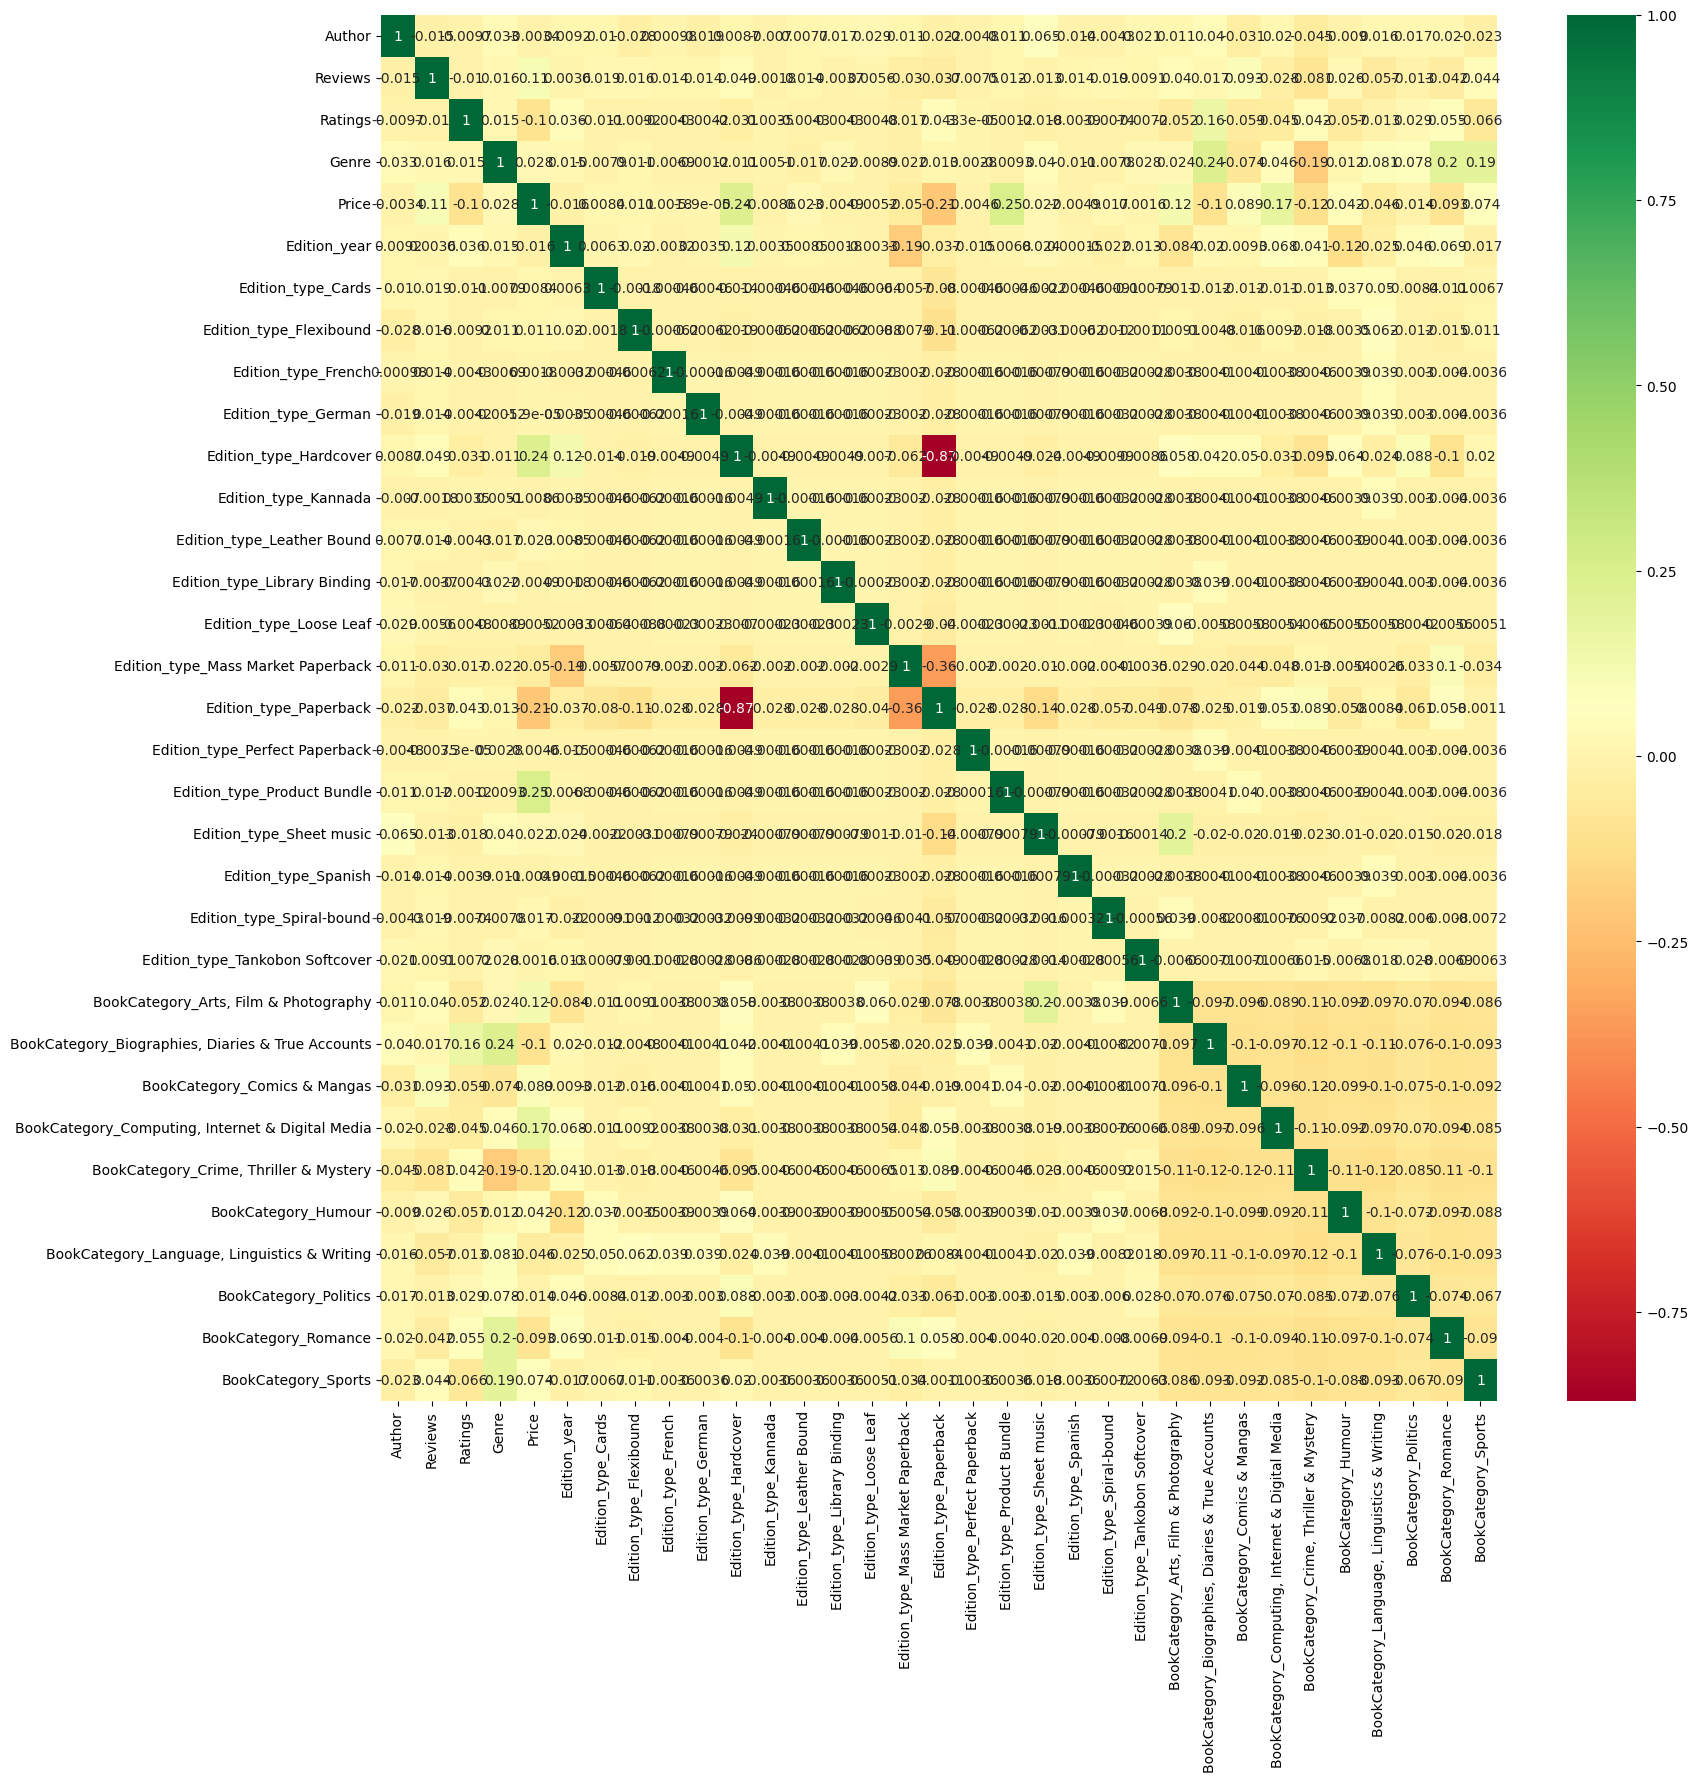

In [67]:
plt.figure(figsize=(18,18))
sns.heatmap(df_train_final.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [68]:
X=df_train_final.drop('Price',axis=1)   # all the features/variables/columns used to predict the value

In [69]:
y=df_train_final['Price']        # value to be predicted

#### Model training

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) # refer sklearn documentation to understand the parameters


In [72]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)                 # RF is the name of the model. The algorithm used to build the model is random forest

RandomForestRegressor()

### Model evalution using R square

In [73]:
y_pred=RF.predict(X_test)

In [86]:
RF.score(X_train,y_train)    # 87% accuracy of the model determined using R squared metric

0.8709735358543732